<a href="https://colab.research.google.com/github/jumunseong99-hue/Statistics_TIL_jumu/blob/main/Scatter_Plot_English_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

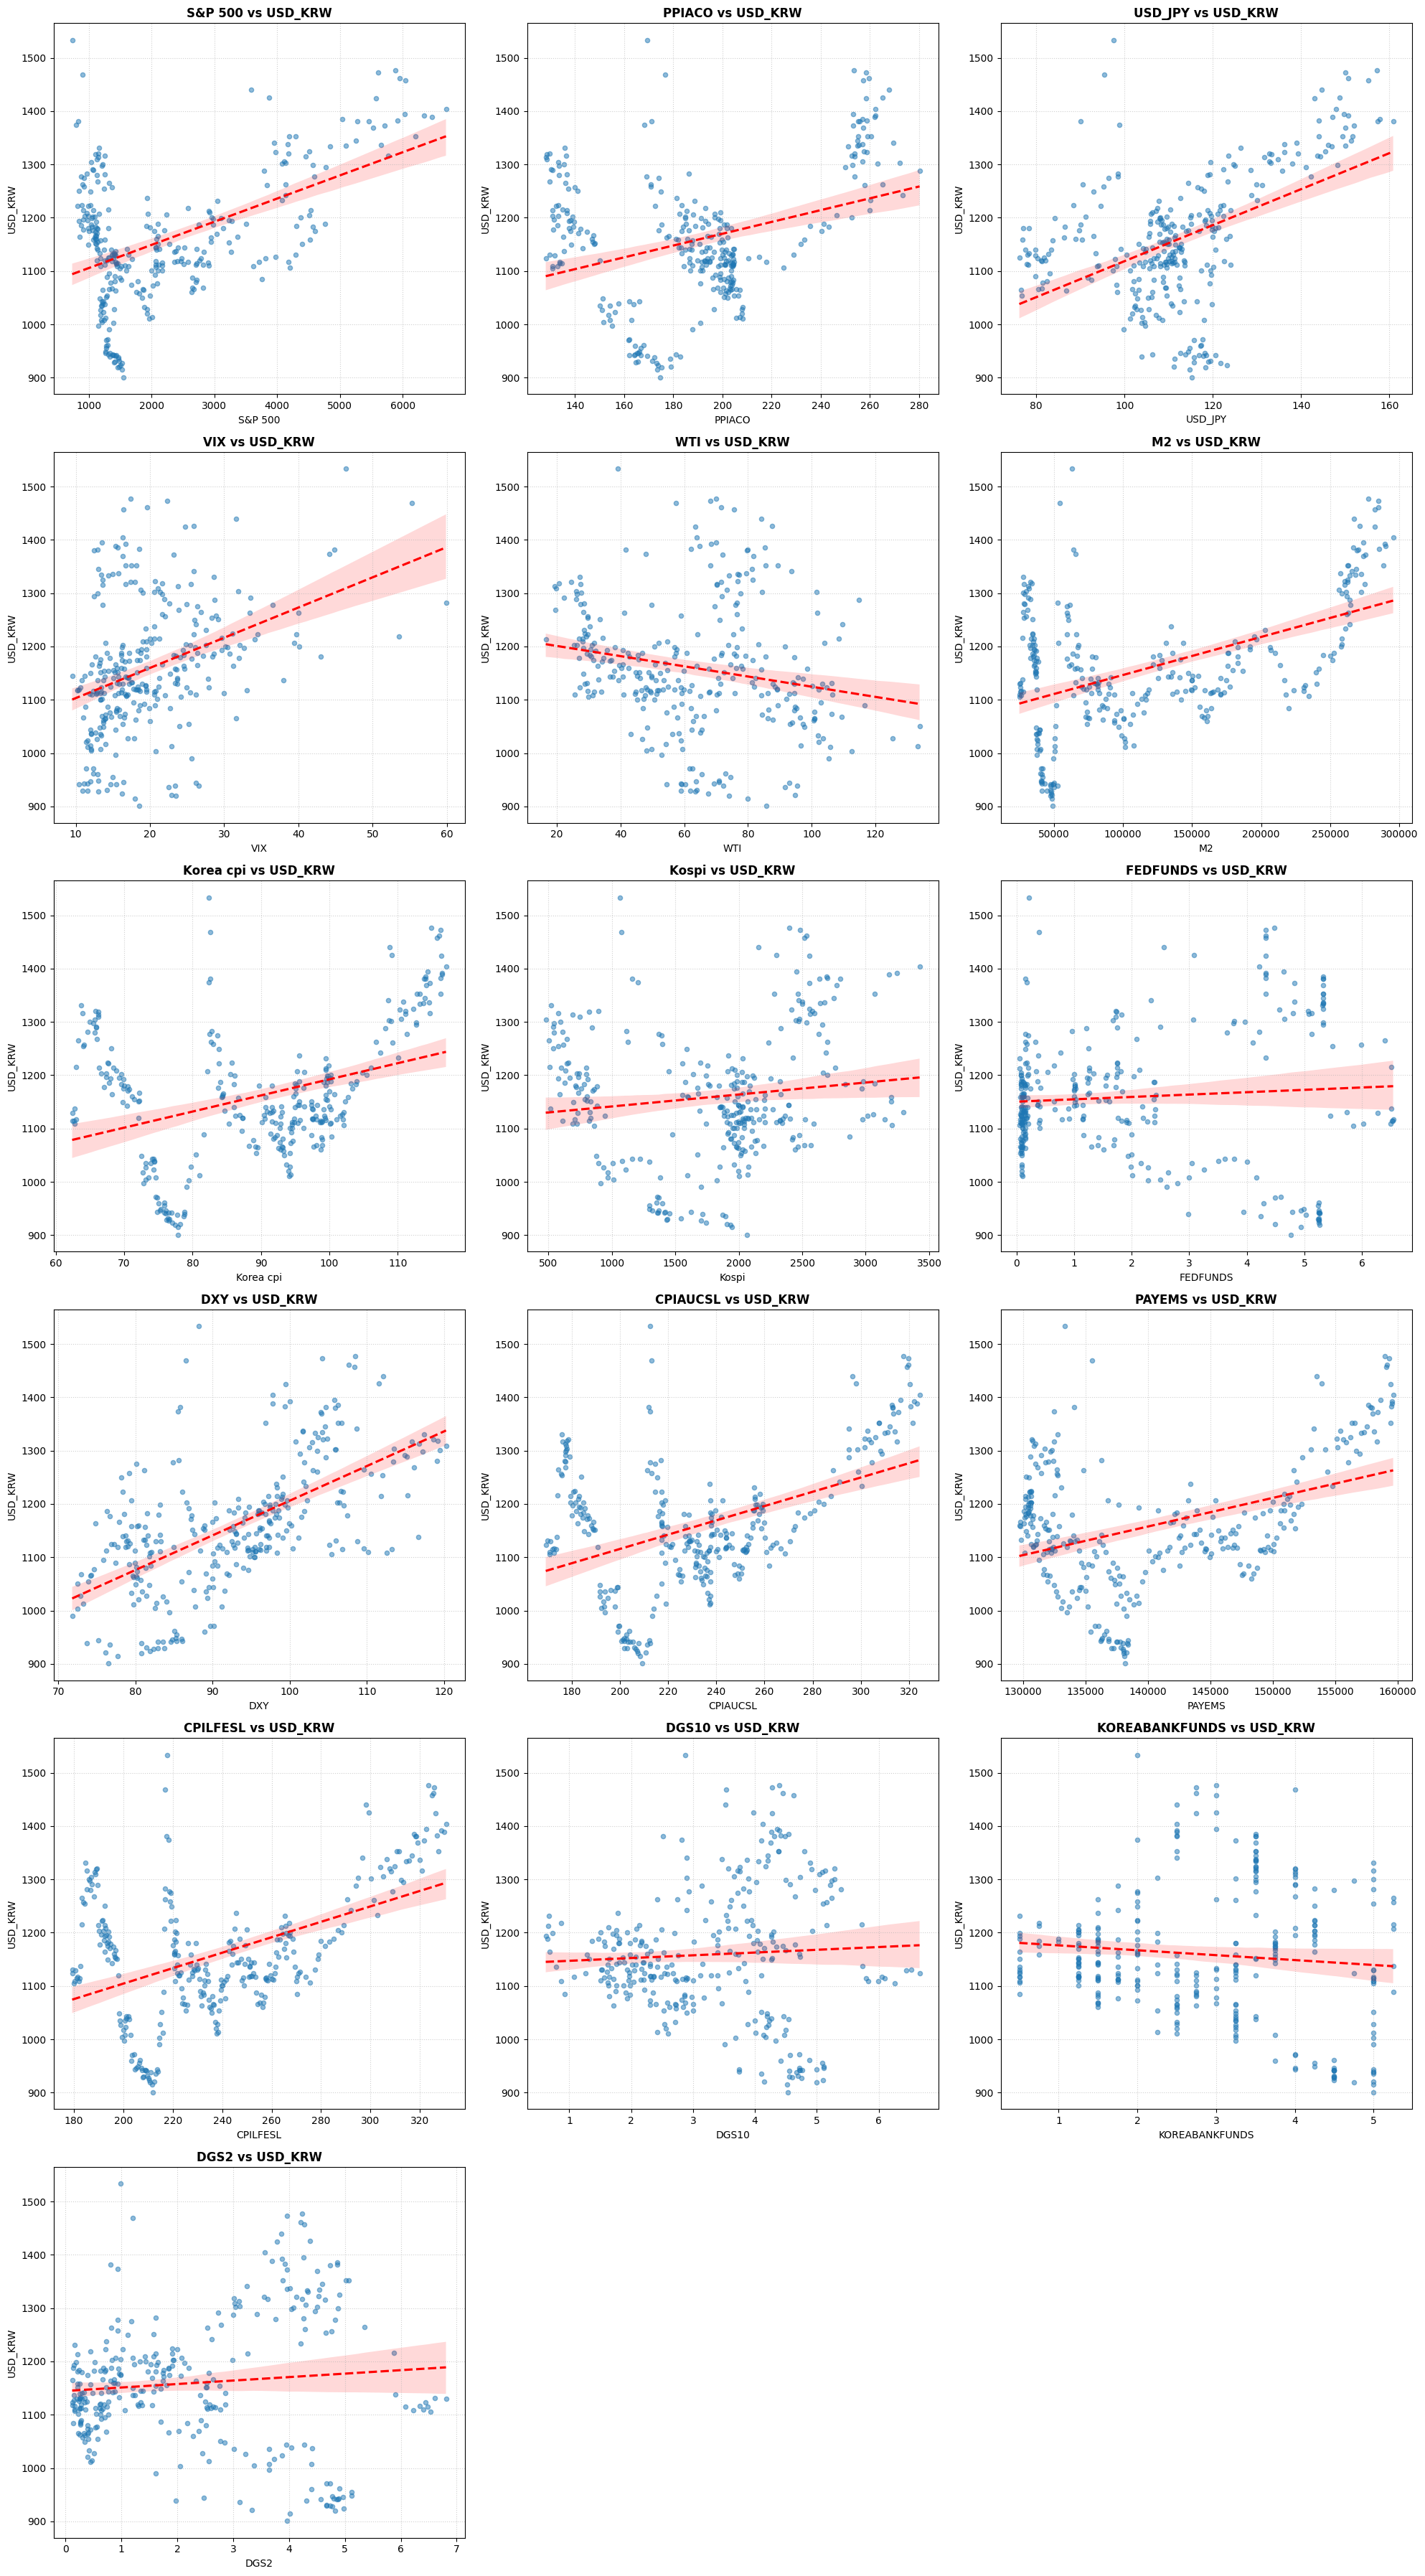

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 데이터 불러오기
# 업로드해주신 파일명과 동일하게 설정합니다.
file_path = '스캐터 플랏.xlsx - Sheet1.csv'

try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='cp949')

# 2. 분석할 변수 설정
# Y축(종속변수): 원달러환율 (USD_KRW)
target_col = 'USD_KRW'

# X축(독립변수): 날짜와 타겟 변수를 제외한 모든 숫자형 컬럼 선택
# select_dtypes(include=[np.number])를 사용하여 숫자 데이터만 자동으로 골라냅니다.
feature_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col != target_col]

# 3. 그래프 설정 (Subplots)
# 한 줄에 3개씩 그래프를 배치하도록 계산
n_cols = 3
n_rows = int(np.ceil(len(feature_cols) / n_cols))

# 전체 그래프 크기 설정
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
axes = axes.flatten() # 2차원 배열을 1차원으로 펼침

# 4. 반복문으로 각 변수별 그래프 그리기
for i, col in enumerate(feature_cols):
    # 산점도(Scatter)와 추세선(Regression Line) 함께 그리기
    # scatter_kws={'alpha': 0.5}: 점의 투명도 조절
    # line_kws={'color': 'red'}: 추세선 색상 설정
    sns.regplot(data=df, x=col, y=target_col, ax=axes[i],
                scatter_kws={'alpha': 0.5, 's': 20},
                line_kws={'color': 'red', 'linestyle': '--'})

    # 제목 및 라벨 설정 (영문이므로 별도 폰트 설정 불필요)
    axes[i].set_title(f'{col} vs {target_col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_col)
    axes[i].grid(True, linestyle=':', alpha=0.6)

# 5. 남는 빈 그래프 영역 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()